<a href="https://colab.research.google.com/github/luisespriella9/Computer-Vision-Udemy/blob/master/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get files from drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
working_directory = 'drive/My Drive/Computer-Vision-with-Python/DATA'

In [3]:
! ls 'drive/My Drive/Computer-Vision-with-Python/DATA'

00-puppy.jpg	      flat_chessboard.png    real_chessboard.jpg
bank_note_data.txt    giraffes.jpg	     ReceiptSwiss.jpg
bricks.jpg	      gorilla.jpg	     reeses_puffs.png
car_plate.jpg	      haarcascades	     road_image.jpg
cartoon_receipt.jpg   hand_move.mp4	     sammy_face.jpg
chessboard_mat.jpg    horse.jpg		     sammy.jpg
coins_on_white.jpg    internal_external.png  sammy_noise.jpg
crossword.jpg	      lbpcascades	     separate_coins.jpg
damien_hirst_dot.jpg  Logo.jpg		     solvay_conference.jpg
Denis_Mukwege.jpg     lucky_charms.jpg	     sudoku.jpg
dog_backpack.jpg      many_cereals.jpg	     uspassport.jpg
dog_backpack.png      Nadia_Murad.jpg	     video_capture.mp4
dot_grid.png	      overlap_coins.jpg      watermark_no_copy.png
finger_move.mp4       pennies.jpg	     wood_detail.jpg
five_shapes.PNG       rainbow.jpg


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def load_image(path, gray=False):
    if (gray):
        img = cv2.imread(path, 0)
    else:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if (img is None):
        print("could not read image in path: ", path)
    return img

def show_image(img, gray=False):
    if gray:
      plt.imshow(img, cmap='gray') 
    else:
      plt.imshow(img)
    plt.axis('off')
    plt.show()

# Corner Detection

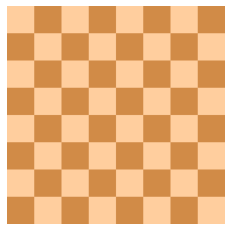

In [27]:
flat_chess = load_image(working_directory+'/flat_chessboard.png')
show_image(flat_chess)

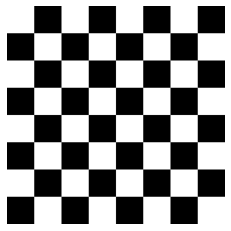

In [28]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
show_image(gray_flat_chess, gray=True)

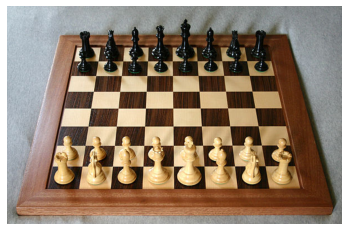

In [29]:
real_chess = load_image(working_directory+'/real_chessboard.jpg')
show_image(real_chess)

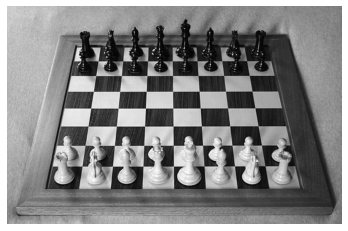

In [30]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
show_image(gray_real_chess, gray=True)

## Apply Harris Corner Detection to both Images

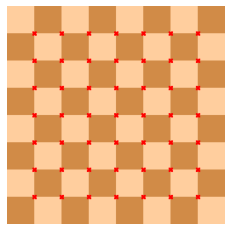

In [31]:
gray_flat_chess = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray_flat_chess, blockSize=2, ksize=5, k=0.04)

dst = cv2.dilate(dst, None)

flat_chess[dst>0.01*dst.max()] = [255, 0, 0] # color red wherever the value is greater than 1% of the max value for harris corner
show_image(flat_chess)

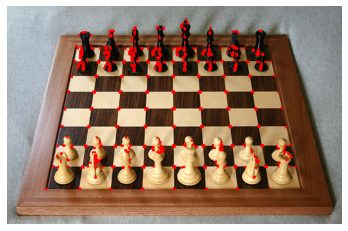

In [32]:
gray_real_chess = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray_real_chess, blockSize=2, ksize=5, k=0.04)

dst = cv2.dilate(dst, None)

real_chess[dst>0.01*dst.max()] = [255, 0, 0] # color red wherever the value is greater than 1% of the max value for harris corner
show_image(real_chess)

## Apply Shi-Tomasi Corner Detection to both Images

In [0]:
flat_chess = load_image(working_directory+'/flat_chessboard.png')
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
real_chess = load_image(working_directory+'/real_chessboard.jpg')
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

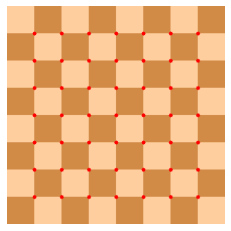

In [34]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, maxCorners=64, qualityLevel=0.01, minDistance=10, corners=10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255, 0, 0), -1)

show_image(flat_chess)

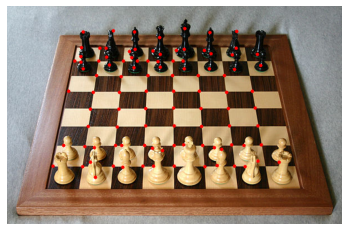

In [35]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255, 0, 0), -1)

show_image(real_chess)

# Edge Detection

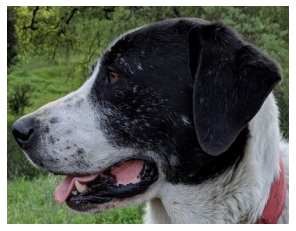

In [36]:
sammy_face = load_image(working_directory+'/sammy_face.jpg')
show_image(sammy_face)

blurred


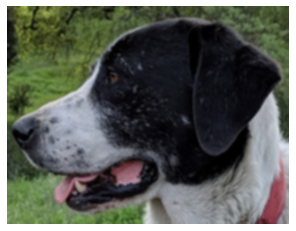

edge detection


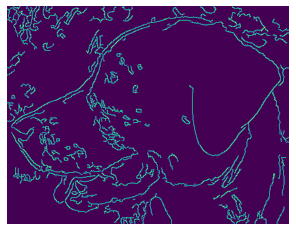

In [37]:
# blur image
blurred_sammy_face = cv2.blur(sammy_face, ksize=(5, 5))
print("blurred")
show_image(blurred_sammy_face)
median_pixel_val = np.median(blurred_sammy_face)
lower_th = int(max(0, 0.7*median_pixel_val))
upper_th = int(min(255, 1.3*median_pixel_val))
edges = cv2.Canny(blurred_sammy_face, threshold1=lower_th, threshold2=upper_th+50)
print("edge detection")
show_image(edges)

# Grid Detection

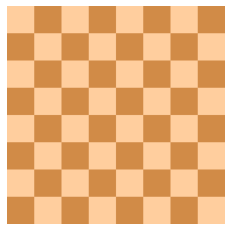

In [38]:
flat_chess = load_image(working_directory+'/flat_chessboard.png')
show_image(flat_chess)

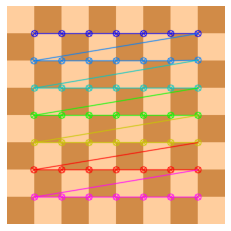

In [39]:
found, corners = cv2.findChessboardCorners(flat_chess, (7, 7))
if found:
    cv2.drawChessboardCorners(flat_chess, (7, 7), corners, found)
show_image(flat_chess)

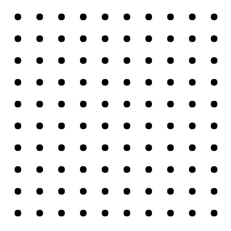

In [40]:
dots = load_image(working_directory+'/dot_grid.png')
show_image(dots)

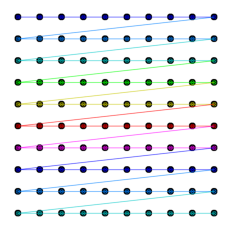

In [41]:
found, corners = cv2.findCirclesGrid(dots, (10, 10), cv2.CALIB_CB_SYMMETRIC_GRID)
if found:
    cv2.drawChessboardCorners(dots, (10, 10), corners, found)
show_image(dots)

# Contour Detection

shape:  (652, 1080)


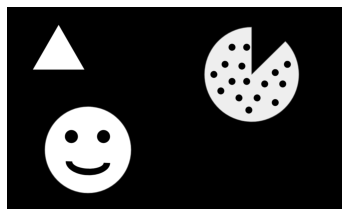

In [42]:
shapes = load_image(working_directory+'/internal_external.png', gray=True)
print("shape: ", shapes.shape)
show_image(shapes, gray=True)

In [51]:
contours, hierarchy = cv2.findContours(shapes, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
external_contours = np.zeros(shapes.shape)
internal_contours = np.zeros(shapes.shape)
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [0]:
for i in range(len(contours)):
    # if external contour (actually touching the background)
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
    else:
        cv2.drawContours(internal_contours, contours, i, 255, -1)

external contours (aka actually touching the background)


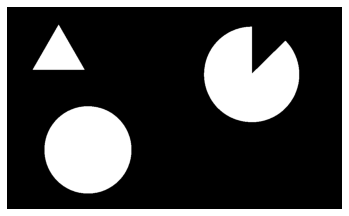

In [53]:
print("external contours (aka actually touching the background)")
show_image(external_contours, gray=True)

internal contours (aka touching a foreground object)


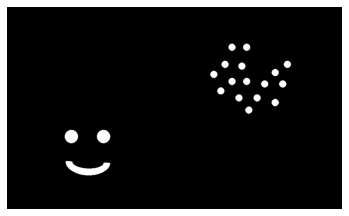

In [54]:
print("internal contours (aka touching a foreground object)")
show_image(internal_contours, gray=True)